In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.shape

(506, 14)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAAD,TAX,PTEATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
cor = data.corr()
med = cor["MEDV"].sort_values(ascending = False)
med

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAAD      -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTEATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

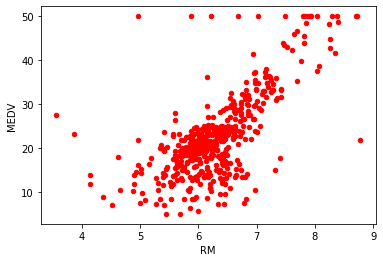

In [6]:
data.plot(kind = 'scatter', x = 'RM', y= 'MEDV', color = "red")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAAD     506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTEATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# MODEL APPLY


In [8]:
train, test =  train_test_split(data, test_size = 0.2, random_state = 42, stratify = data["CHAS"])

In [9]:
train.shape

(404, 14)

In [10]:
test.shape

(102, 14)

In [11]:
x_train = train.drop("MEDV", axis = 1)
y_train = train[["MEDV"]]

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [13]:
pip = Pipeline([
    ("stand" , StandardScaler()),
    ("imp" , SimpleImputer()), 
])

In [14]:
x_fit = pip.fit_transform(x_train)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [16]:
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

In [17]:
model.fit(x_fit, y_train)

C:\Users\PC16CA~1\AppData\Local\Temp/ipykernel_1588/1092360074.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_fit, y_train)


RandomForestRegressor()

In [18]:
pred = model.predict(x_fit)

In [19]:
pred[:5]

array([22.404, 25.246, 16.523, 23.352, 23.496])

In [20]:
y_train.head()

,MEDV
254,21.9
348,24.5
476,16.7
321,23.1
326,23.0


In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse = mean_squared_error(pred, y_train)

In [23]:
rmse = np.sqrt(mse)

In [24]:
rmse

1.2862940078972906

# Cross Volidation

In [25]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model, x_fit, y_train, scoring = "neg_mean_squared_error", cv = 10)

e:\softwares\python setup\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\softwares\python setup\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\softwares\python setup\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\softwares\python setup\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector 

In [26]:
sqrt = np.sqrt(-cvs)

In [27]:
sqrt

array([2.83124432, 2.77555987, 4.5146998 , 2.67442076, 3.31666955,
       2.6818989 , 4.54102173, 3.3338785 , 3.38670883, 3.29432296])

In [28]:
def score():
    print("Scores: ", cvs)
    print("Mean: ", cvs.mean())
    print("Standered_deviation: ", cvs.std())

In [29]:
print(score())

Scores:  [ -8.01594441  -7.70373259 -20.38251432  -7.15252639 -11.0002969
  -7.1925817  -20.62087837 -11.11474585 -11.46979673 -10.85256377]
Mean:  -11.550558103231705
Standered_deviation:  4.763263590880383
None


# TEST SIZE

In [30]:
x_test = test.drop("MEDV", axis = 1)
y_test= test["MEDV"]
x_pre = pip.fit_transform(x_test)
t_pre = model.predict(x_pre)
t_pre[:5]

array([24.861, 10.445, 25.833, 21.493, 17.135])

In [31]:
from sklearn.metrics import mean_squared_error
ms = mean_squared_error(t_pre, y_test)
rse = np.sqrt(ms)
rse

3.47343895533959

In [32]:
y_test.head()

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
Name: MEDV, dtype: float64

In [33]:
x_pre[0]

array([-0.35082247, -0.49148409, -1.25183452, -0.27144836, -0.21067276,
        0.35869844, -0.25450164,  1.07434355, -0.91150503,  0.17974455,
       -1.08091535,  0.2995192 , -0.51357301])

# Simple method

In [34]:
x = data.drop("MEDV", axis = 1)
y = data["MEDV"]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = data["CHAS"])
lr.fit(x_train,y_train)
pre = lr.predict(x_test)

In [35]:
y_test.head()

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
Name: MEDV, dtype: float64

In [36]:
pre[:5]

array([22.69663678, 17.22600313, 30.02303718, 30.72767895,  8.8510416 ])

In [37]:
mse = mean_squared_error(y_test, pre)
np.sqrt(mse)

4.143819554319357

In [38]:
from joblib import dump, load
dump(model, "House_Prediction_Joplib")

['House_Prediction_Joplib']